# Module 2: Machine Learning - Apprentissage non supervisé

* Partie 2.1: Les K plus Proches Voisins [[Notebook]](./2_1_knn.ipynb)
* Partie 2.2: A linéaire [[Notebook]](./2_2_régression_linéaire.ipynb)
* **Partie 2.3: Régression logistique** [[Notebook]](./2_3_régression_logistique.ipynb)
* Partie 2.4: SVM [[Notebook]](./2_4_svm.ipynb)
<hr>

# Partie 2.3: Régression logistique
La régression est un algorithme d'apprentissage supervisé (classification binaire).<br>

<strong>Objectifs</strong>
* Visualiser les données
* Étudier les liens de corrélation linéaire entre les variables
* Réduire le nombre de dimensions

L'idée de l'ACP est de projeter les données sur des axes préservant la variance des données. Avec p=2 ou p=3, on peut visualiser ls données.<br>

<strong>Principe</strong> : approximer un nuage de points X de dimension p par sa projection linéaire en dimension d < p.<br>
L'ACP maximise la variance des points projectés.<br>

On cherche à réaliser la projection x app <i>R<sup>p</sup></i>--><i>R<sup>d</sup></i>, d<p<br>
L'espace de projection <i>P</i> inclus dans <i>R<sup>d</sup></i> sera construit de manière progressive.
* D'abord on va chercher le meilleur axe de projection (1D) <i>u<sub>1</sub></i>
* Ensuite le meilleur plan en trouvant le deuxième axe <i>u<sub>2</sub></i>
* Et ainsi de suite jusqu'à obtenir P

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

## Importation des données
Le jeu de donnés contient des donnés récuellies chez des patients, il comporte 100 lignes et 9 colonnes. La colonne <i>diagnosis_result</i> est la variable à expliquer qui represente le resultat du diagnostic. Les 8 dernières colonnes représentent les variables explicatives.

In [2]:
dt = pd.read_csv('datasets/Prostate_Cancer.csv', index_col='id')
dt.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,,,,,,,,,
1,M,23,12,151,954,0.143,0.278,0.242,0.079
2,B,9,13,133,1326,0.143,0.079,0.181,0.057
3,M,21,27,130,1203,0.125,0.160,0.207,0.060
4,M,14,16,78,386,0.070,0.284,0.260,0.097
5,M,9,19,135,1297,0.141,0.133,0.181,0.059


## Exploration

### Variable à expliquer

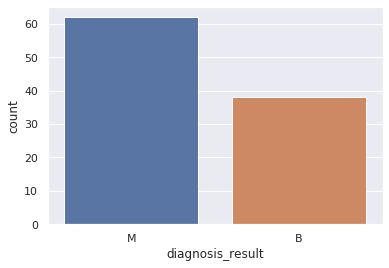

In [3]:
sns.countplot(x='diagnosis_result', data=dt)

In [4]:
dt.diagnosis_result.value_counts()

M    62
B    38
Name: diagnosis_result, dtype: int64

Les classes M et B sont déséquilibrées M(62) et B(38), il faudra en tenir compte dans la suite. Un modèle naïf qui prédit la classe M aurait une accuracy de 62% sans avoir appris les données.

### Variables explicatives

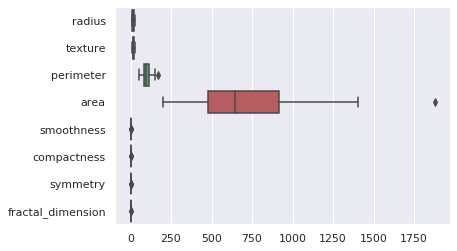

In [5]:
sns.boxplot(data=dt, orient='h')

Les variables ont des échelles (ou ordres de grandeur) différentes, il faut supprimer la dimension
## Centrage et Réduction
* Centrer une variable consiste à retrancher la moyenne de toutes les données, la nouvelle moyenne est 0.
* Réduire (ou normliser) une variable consiste à diviser toutes les données par l'écart-type, le nouvel écart-type est 1.

In [6]:
X = dt.iloc[:, 1:]
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
dt.iloc[:, 1:] = X_scaled

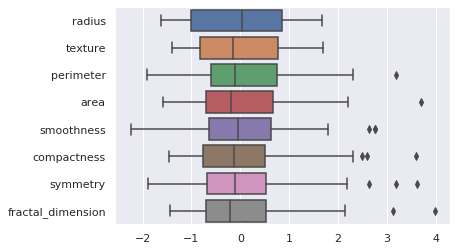

In [7]:
sns.boxplot(data=dt, orient='h')

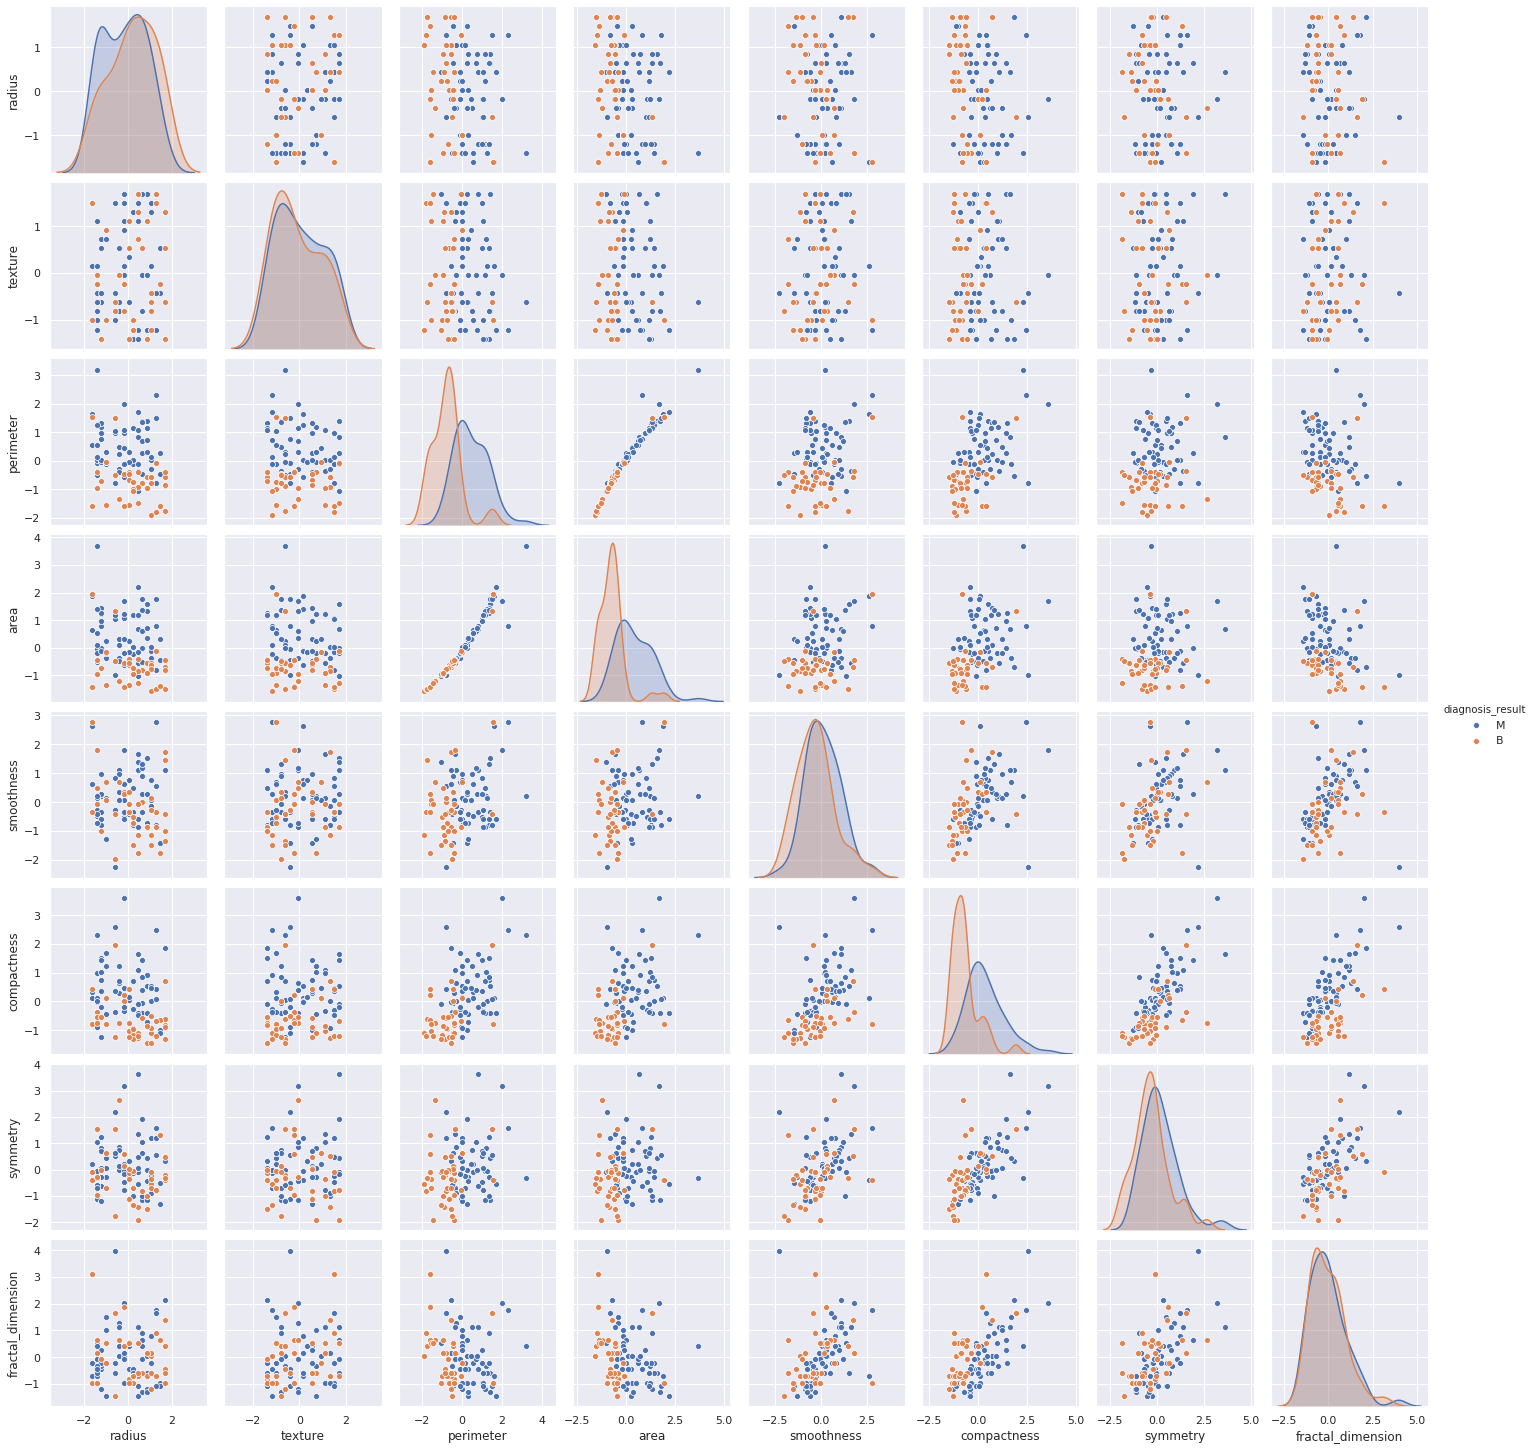

In [8]:
sns.pairplot(data=dt, hue='diagnosis_result')

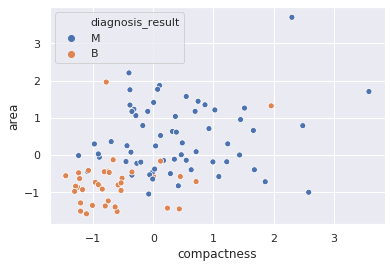

In [9]:
sns.scatterplot(x='compactness', y='area', hue='diagnosis_result', data=dt)

## Encodage de la variable explicative
On encode les valeurs B et M en 0 et 1.

In [10]:
y = dt.iloc[:, 0]
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=.3)

L'argument _stratify_ c'est pour indiquer que l'on souhaite que la séparation soit équilibrée suivant la variable _diagnosis_result_.

## Régression logistique avec Scikit-learn

In [12]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Évaluation
Plusieurs métriques peuvent être utilsés pour évaluer un modèle de classification (binaire). Le plus utilsé est l'accuracy.
* **Accuracy**: le taux de bonnes prédictions. Lorsque les classes sont déséquilibrées, elle peut être trompeuse.
* **Précision**: le taux de bonnes prédictions sur les prédictions positives.
* **Rappel**: le taux de bonnes prédictions sur les données positives.
* **F1_score**:

Accuracy: 0.83
F1 score: 0.86


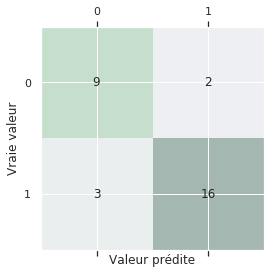

In [13]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred)
confmat = confusion_matrix(y_test, y_pred)

print('Accuracy: %0.2f' % acc)
print('F1 score: %0.2f' % f1)

plt.matshow(confmat, cmap=plt.cm.Greens, alpha=.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        plt.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Valeur prédite')
plt.ylabel('Vraie valeur')
plt.show()

## Interprétaion
Le premier axe conserve 41,2% le deuxième axe 19,4% et le troisème axe 14,3%. Les trois axes permettent de conserver environ 75% de variance des données. Si l'on souhaite conserver plus de variance, on peut ajouter un axe supplémentaire ou plus. Remarquons qu'il est peu pertinent de conserver toute la variance, autant travailler avec les données initiales, il ne faut pas perdre de vue que l'un des objectifs de l'ACP, c'est la réduction du nombre de dimensions.

<strong>Références</strong>
* [Appilquez l'apprentissage statistique aux objets connectés]()
* [Appilquez l'apprentissage statistique aux objets connectés]()
* [Appilquez l'apprentissage statistique aux objets connectés]()

<strong>Contribuer à ce projet</strong><br>
Toute contribution de votre part serait vivement appréciée. Si vous souhaiter contribuer à ce projet, merci de consulter ce guide [CONTRIBUTING](CONTRIBUTING.md)

<strong>Signaler un bug</strong><br>
Si vous avez rencontré un bug durant l'éxecution de ce notebook, pour le signaler, il suffit d'ouvrir une <i>issue</i>.

<strong>Sponsors</strong><br>
* [Rintio]()
* [Solidar'IT]()

<strong>Copyright & Licence</strong><br>
Sous licence MIT